In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [14]:
import matplotlib as mlib
mlib.rcParams.update({'font.size': 16})
mlib.rcParams.update({'errorbar.capsize': 2})

In [15]:
f_mean = 20
f_peak = 152.8
f_base = 5
sigma_stim = 2

In [185]:

def distance(x0, x1, grid=np.asarray([16, 16]), type='euclidian'):
    x0 = np.asarray(x0)
    x1 = np.asarray(x1)
    delta = np.abs(x0 - x1)
    if delta[0] > grid[0] * .5 and grid[0] > 0:
        delta[0] -= grid[0]

    if delta[1] > grid[1] * .5 and grid[1] > 0:
        delta[1] -= grid[1]

    if type == 'manhattan':
        return np.abs(delta).sum(axis=-1)
    return np.sqrt((delta ** 2).sum(axis=-1))

def generate_rates(s, grid=np.asarray([16, 16]), f_base=5., f_peak=152.8, sigma_stim=2.):
    ''' 
    Function that generates an array the same shape as the input layer so that
    each cell has a value corresponding to the firing rate for the neuron
    at that position.
    '''
    _rates = np.empty(grid)
    for x in range(grid[0]):
        for y in range(grid[1]):
            _d = distance(s, (x, y), grid)
            _rates[x, y] = f_base + (f_peak * (np.exp(
                (-_d * 2) / (sigma_stim ** 2))))
    return _rates

def generate_gaussian_rates(s, grid=np.asarray([16, 16]), f_base=5., f_peak=152.8, sigma_stim=2.):
    ''' 
    Function that generates an array the same shape as the input layer so that
    each cell has a value corresponding to the firing rate for the neuron
    at that position.
    '''
    _rates = np.empty(grid)
    for x in range(grid[0]):
        for y in range(grid[1]):
            _d = distance(s, (x, y), grid)
            _rates[x, y] = f_peak * (np.exp(
                (-_d**2 ) / (sigma_stim ** 2* 2)))
    
    means_ratio = float(f_mean - f_base) / np.mean(_rates)       
    _rates = _rates * means_ratio + f_base
    
    assert np.isclose(np.mean(_rates), f_mean, 0.01, 0.01), "{} vs. {}".format(np.mean(_rates), f_mean)
    
    return _rates

def generate_multimodal_gaussian_rates(s, grid, f_base=5, f_peak=152.8, sigma_stim=2):
    '''
    Function that generates an array the same shape as the input layer so that
    each cell has a value corresponding to the firing rate for the neuron
    at that position.
    '''
    _rates = np.zeros(grid)
    for pos in s:
        for x in range(grid[0]):
            for y in range(grid[1]):
                _d = distance(pos, (x, y), grid)
                _rates[x, y] += (f_peak * (np.exp(
                    (-_d ** 2) / (sigma_stim ** 2 * 2))))

    for x in range(grid[0]):
        for y in range(grid[1]):
            _rates[x, y] += f_base
    return _rates

In [95]:
rates = generate_rates([7,7], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=sigma_stim)
print np.max(rates)
print np.std(rates)

157.8
19.8640522098


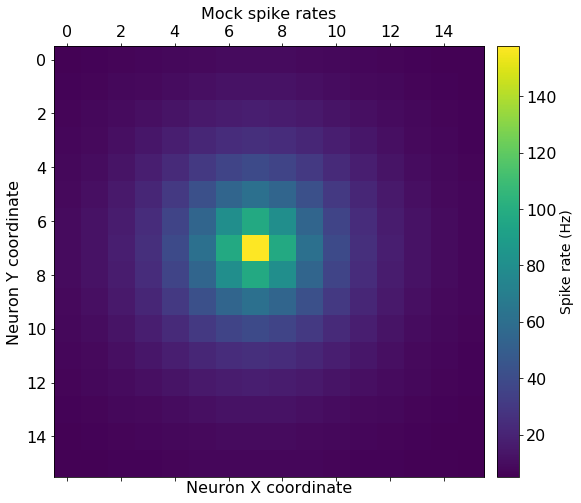

In [94]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(rates, vmin=5, vmax=f_peak+f_base)
ax1.grid(visible=False)
ax1.set_title("Mock spike rates", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spike rate (Hz)", fontsize=14)
plt.tight_layout(.3)

In [43]:
np.mean(rates)

19.066936910399001

In [44]:
np.max(rates)

157.80000000000001

In [45]:
assert np.max(rates) == f_peak + f_base, np.max(rates)

In [46]:
assert np.isclose(np.average(rates), f_mean, 0.1, 0.1), np.average(rates)

In [24]:
rates_mm = generate_multimodal_gaussian_rates([[4,4],[11,11]], [16,16],
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=sigma_stim)

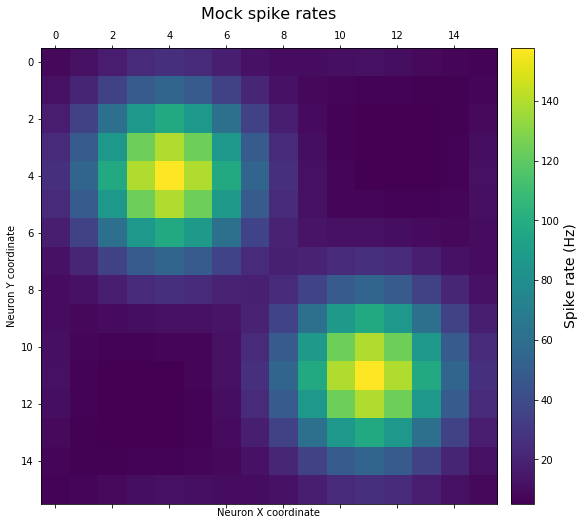

In [25]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(rates_mm)
ax1.grid(visible=False)
ax1.set_title("Mock spike rates", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spike rate (Hz)", fontsize=14)
plt.tight_layout(.3)

In [26]:
np.mean(rates_mm)

34.997139705142722

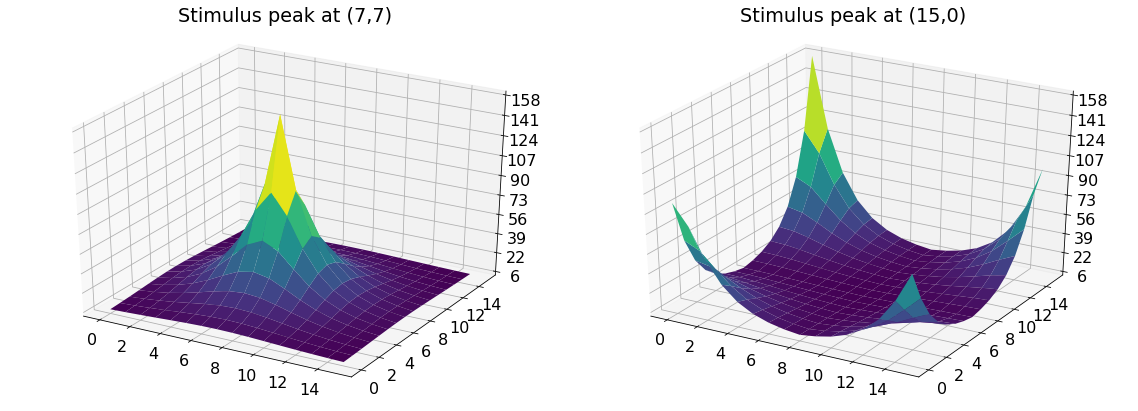

In [22]:
# fig = plt.figure(figsize=(12, 8), dpi=600)
fig = plt.figure(figsize=(16, 6), dpi=600)
ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax = fig.gca(projection='3d')

rates = generate_rates([7,7], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=sigma_stim)
# Plot the surface.
X, Y = np.meshgrid(np.arange(rates.shape[0]), np.arange(rates.shape[0]))

surf = ax.plot_surface(X, Y, rates, cmap=cm.viridis,
                       linewidth=0, antialiased=True, vmax=np.max(rates)*.7)

ax.set_title("Stimulus peak at (7,7)\n")

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# ax2 = fig.gca(projection='3d')
X, Y = np.meshgrid(np.arange(rates.shape[0]), np.arange(rates.shape[0]))

rates2 = generate_rates([15,0], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=sigma_stim)

surf2 = ax2.plot_surface(X, Y, rates2, cmap=cm.viridis,
                       linewidth=0, antialiased=True, vmax=np.max(rates)*.75)
ax2.set_title("Stimulus peak at (15,0)\n")
# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.xaxis.set_major_locator(LinearLocator(8))
# ax.yaxis.set_major_locator(LinearLocator(8))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# ax2.xaxis.set_major_locator(LinearLocator())
# ax2.yaxis.set_major_locator(LinearLocator(8))
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(surf2, cax=cax)
# cbar.set_label("Spearman rank-order correlation", fontsize=14)
plt.tight_layout()
fig.savefig("3d_stimulus_location_pointy.png")


# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=10)

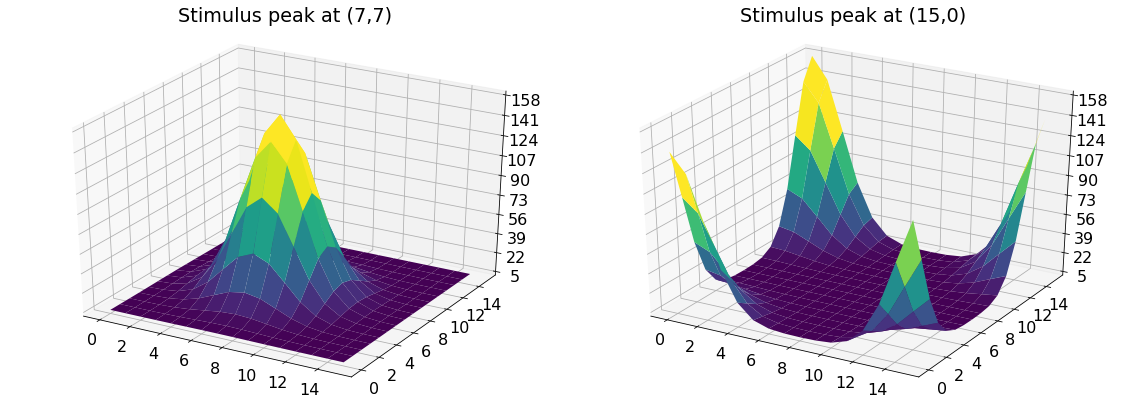

In [23]:
# fig = plt.figure(figsize=(12, 8), dpi=600)
fig = plt.figure(figsize=(16, 6), dpi=600)
ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax = fig.gca(projection='3d')

rates = generate_gaussian_rates([7,7], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=sigma_stim)
# Plot the surface.
X, Y = np.meshgrid(np.arange(rates.shape[0]), np.arange(rates.shape[0]))

surf = ax.plot_surface(X, Y, rates, cmap=cm.viridis,
                       linewidth=0, antialiased=True, vmax=np.max(rates)*.75)

ax.set_title("Stimulus peak at (7,7)\n")

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# ax2 = fig.gca(projection='3d')
X, Y = np.meshgrid(np.arange(rates.shape[0]), np.arange(rates.shape[0]))

rates2 = generate_gaussian_rates([15,0], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=sigma_stim)

surf2 = ax2.plot_surface(X, Y, rates2, cmap=cm.viridis,
                       linewidth=0, antialiased=True, vmax=np.max(rates)*.7)
ax2.set_title("Stimulus peak at (15,0)\n")
# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.xaxis.set_major_locator(LinearLocator(8))
# ax.yaxis.set_major_locator(LinearLocator(8))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# ax2.xaxis.set_major_locator(LinearLocator())
# ax2.yaxis.set_major_locator(LinearLocator(8))
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(surf2, cax=cax)
# cbar.set_label("Spearman rank-order correlation", fontsize=14)
plt.tight_layout()
fig.savefig("3d_stimulus_location_gaussian.png")


# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=10)

19.9985698526
30.3500781461


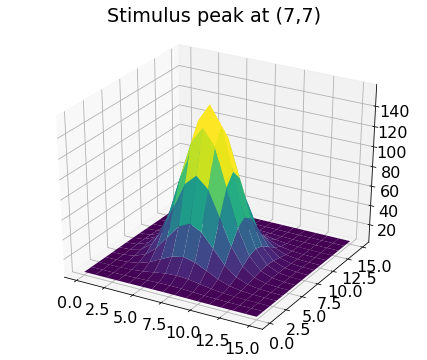

In [98]:
gaussian_rates = generate_gaussian_rates([7,7], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=sigma_stim)

print np.mean(gaussian_rates)
print np.std(gaussian_rates)
# fig = plt.figure(figsize=(12, 8), dpi=600)
fig = plt.figure(figsize=(16, 6), dpi=600)
ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax = fig.gca(projection='3d')

rates = gaussian_rates
# Plot the surface.
X, Y = np.meshgrid(np.arange(rates.shape[0]), np.arange(rates.shape[0]))

surf = ax.plot_surface(X, Y, rates, cmap=cm.viridis,
                       linewidth=0, antialiased=True, vmax=np.max(rates)*.75)

ax.set_title("Stimulus peak at (7,7)\n")

In [78]:
threshold = 40
clipped_gaussian_rates_no_base = threshold * (~np.logical_and(gaussian_rates<threshold+f_base, gaussian_rates>f_base ))
mean_no_base = np.mean(clipped_gaussian_rates_no_base)
means_ratio = float(f_mean - f_base) / (mean_no_base )
clipped_gaussian_rates_no_base = clipped_gaussian_rates_no_base * means_ratio
clipped_gaussian_rates = clipped_gaussian_rates_no_base + f_base

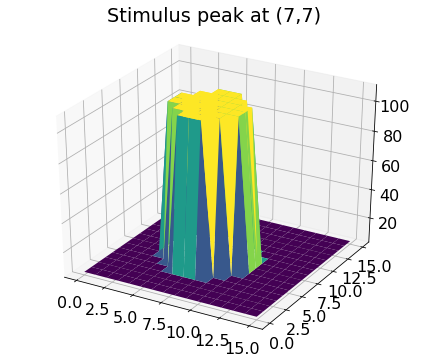

In [79]:
# fig = plt.figure(figsize=(12, 8), dpi=600)
fig = plt.figure(figsize=(16, 6), dpi=600)
ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax = fig.gca(projection='3d')

rates = clipped_gaussian_rates
# Plot the surface.
X, Y = np.meshgrid(np.arange(rates.shape[0]), np.arange(rates.shape[0]))

surf = ax.plot_surface(X, Y, rates, cmap=cm.viridis,
                       linewidth=0, antialiased=True, vmax=np.max(rates)*.75)

ax.set_title("Stimulus peak at (7,7)\n")

In [80]:
x = ~np.logical_and(gaussian_rates<threshold+f_base, gaussian_rates>f_base )

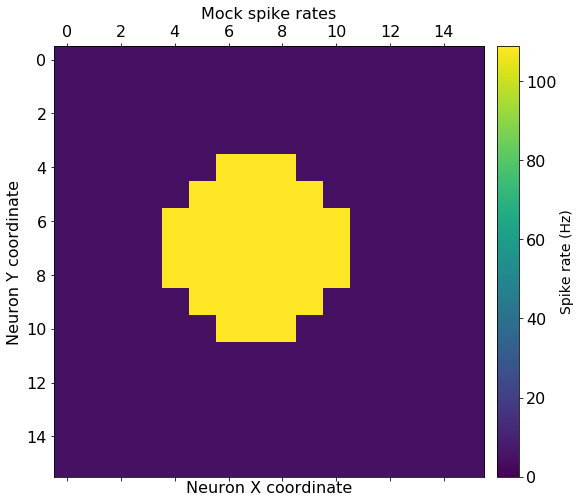

In [81]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(clipped_gaussian_rates, vmin=0)
ax1.grid(visible=False)
ax1.set_title("Mock spike rates", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spike rate (Hz)", fontsize=14)
plt.tight_layout(.3)

In [97]:
print np.mean(clipped_gaussian_rates)
print np.std(clipped_gaussian_rates)

20.0
36.4932426177


In [210]:
def generate_square_rates(s, grid=np.asarray([16, 16]), f_base=5., f_peak=152.8, sigma_stim=2., f_mean=20):#, threshold=40):
#     gaussian_rates = generate_gaussian_rates(s,
#                            f_base=f_base,
#                            f_peak=f_peak,
#                            sigma_stim=sigma_stim)
#     clipped_gaussian_rates_no_base = threshold * (~np.logical_and(gaussian_rates<threshold+f_base, gaussian_rates>f_base ))
#     mean_no_base = np.mean(clipped_gaussian_rates_no_base)
#     means_ratio = float(f_mean - f_base) / (mean_no_base )
#     clipped_gaussian_rates_no_base = clipped_gaussian_rates_no_base * means_ratio
#     clipped_gaussian_rates = clipped_gaussian_rates_no_base + f_base
    rates = np.empty(grid)
    for x in range(grid[0]):
        for y in range(grid[1]):
            rates[x,y] = 1 if distance((x,y), s, grid=grid) <= float(sigma_stim) else 0
         
    scalar_ratio = ((f_mean-f_base) * rates.size) / np.count_nonzero(rates)
    rates = rates * scalar_ratio
    rates += f_base
#     print rates
#     assert np.isclose(np.mean(rates), f_mean, 0.01, 0.01), "{} vs. {}".format(np.mean(rates), f_mean)
    
    return rates

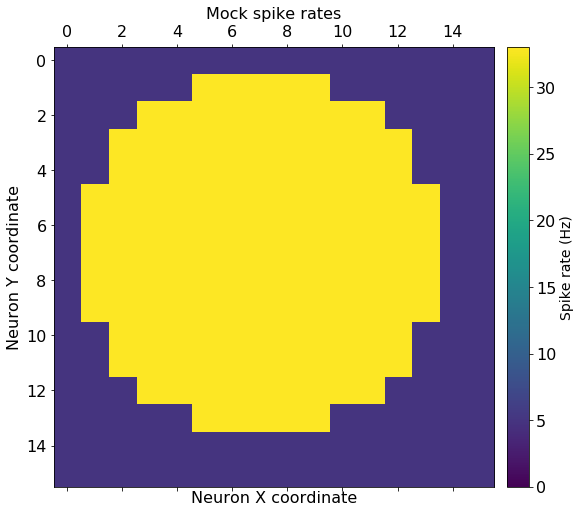

In [168]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(generate_square_rates([7,7], sigma_stim=6.5), vmin=0)
ax1.grid(visible=False)
ax1.set_title("Mock spike rates", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spike rate (Hz)", fontsize=14)
plt.tight_layout(.3)

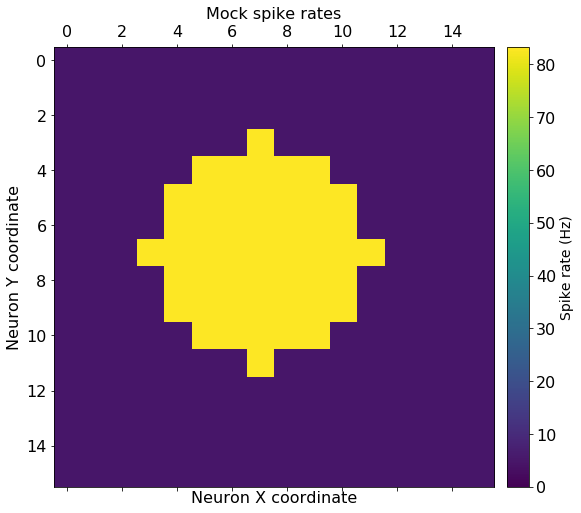

In [121]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(generate_square_rates([7,7], threshold=20), vmin=0)
ax1.grid(visible=False)
ax1.set_title("Mock spike rates", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spike rate (Hz)", fontsize=14)
plt.tight_layout(.3)

# Now scale up the pointy stimulus (but not the background noise)

In [114]:
def generate_scaled_pointy_rates(s, grid=np.asarray([16, 16]), f_base=5., f_peak=152.8, sigma_stim=2., f_mean=20):
    rates = generate_rates(s,
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=sigma_stim)
    denoised_rates = rates - f_base
    mean_no_base = np.mean(denoised_rates)
    means_ratio = float(f_mean - f_base) / (mean_no_base)
    final_rates = denoised_rates * means_ratio + f_base
    
    assert np.isclose(np.mean(final_rates), f_mean)
    
    return final_rates

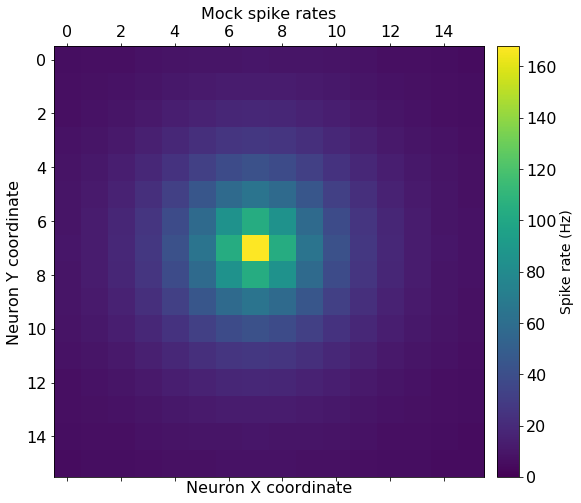

In [89]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(generate_scaled_pointy_rates([7,7]), vmin=0)
ax1.grid(visible=False)
ax1.set_title("Mock spike rates", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spike rate (Hz)", fontsize=14)
plt.tight_layout(.3)

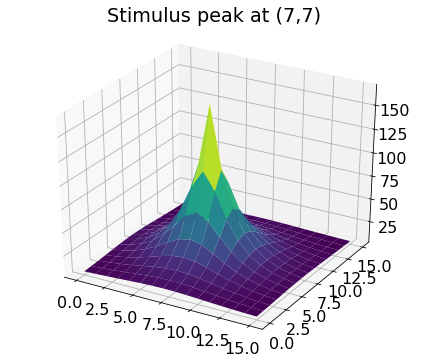

In [90]:
# fig = plt.figure(figsize=(12, 8), dpi=600)
fig = plt.figure(figsize=(16, 6), dpi=600)
ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax = fig.gca(projection='3d')

rates = generate_scaled_pointy_rates([7,7])
# Plot the surface.
X, Y = np.meshgrid(np.arange(rates.shape[0]), np.arange(rates.shape[0]))

surf = ax.plot_surface(X, Y, rates, cmap=cm.viridis,
                       linewidth=0, antialiased=True, vmax=np.max(rates)*.75)

ax.set_title("Stimulus peak at (7,7)\n")

In [91]:
np.mean(rates)


20.0

In [197]:
sigma_stims = np.asarray([.5, 1., 1.5, 2., 2.5, 3., 3.5, 4])

In [198]:
pointy_rates = [ [ss ,np.mean(generate_rates([7,7], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=ss)), np.std(generate_rates([7,7], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=ss))] for ss in sigma_stims]
gaussian_rates = [ [ss ,np.mean(generate_gaussian_rates([7,7], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=ss)), np.std(generate_gaussian_rates([7,7], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=ss))] for ss in sigma_stims]
scaled_pointy_rates = [ [ss ,np.mean(generate_scaled_pointy_rates([7,7], 
                           f_base=f_base, f_mean=20,
                           f_peak=f_peak,
                           sigma_stim=ss)), np.std(generate_scaled_pointy_rates([7,7], 
                           f_base=f_base,f_mean=20,
                           f_peak=f_peak,
                           sigma_stim=ss))] for ss in sigma_stims]
square_rates  = [ [ss ,np.mean(generate_square_rates([7,7], 
                           f_base=f_base, f_mean=20,
                           f_peak=f_peak,
                           sigma_stim=ss)), np.std(generate_square_rates([7,7], 
                           f_base=f_base,f_mean=20,
                           f_peak=f_peak,
                           sigma_stim=ss))] for ss in sigma_stims]

In [199]:
pointy_rates

[[0.5, 5.5977054056615856, 9.5312795235657077],
 [1.0, 6.1896491893971497, 9.8980080038761589],
 [1.5, 9.8466794132682303, 13.878546133717286],
 [2.0, 19.066936910399001, 19.864052209828817],
 [2.5, 33.426992690623408, 23.864966225595271],
 [3.0, 49.728756363783162, 24.999399564805614],
 [3.5, 65.319791228010843, 24.155205688676372],
 [4.0, 79.011430843351533, 22.336135029508139]]

In [200]:
gaussian_rates

[[0.5, 20.0, 153.19310028765722],
 [1.0, 19.999999999999996, 66.027347655824371],
 [1.5, 20.0, 42.569763723207586],
 [2.0, 20.0, 30.352972094417112],
 [2.5, 20.0, 22.649670020681718],
 [3.0, 20.0, 17.35432926318073],
 [3.5, 20.0, 13.594674858448439],
 [4.0, 20.0, 10.873575205159032]]

In [201]:
scaled_pointy_rates

[[0.5, 20.0, 239.19675395144918],
 [1.0, 20.0, 124.80159813615231],
 [1.5, 20.0, 42.952746458916259],
 [2.0, 20.0, 21.181639261292514],
 [2.5, 19.999999999999996, 12.59276692683733],
 [3.0, 20.000000000000004, 8.3836668836094468],
 [3.5, 20.0, 6.0067861302857182],
 [4.0, 20.0, 4.526895664964961]]

In [202]:
square_rates

[[0.5, 20.0, 239.53079134006967],
 [1.0, 20.0, 106.2779375035101],
 [1.5, 19.9765625, 78.45838515215307],
 [2.0, 19.98046875, 64.767459709952135],
 [2.5, 19.9296875, 49.943043120662402],
 [3.0, 19.953125, 41.835589546872349],
 [3.5, 19.88671875, 36.217642608380771],
 [4.0, 19.9296875, 30.685828262446229]]

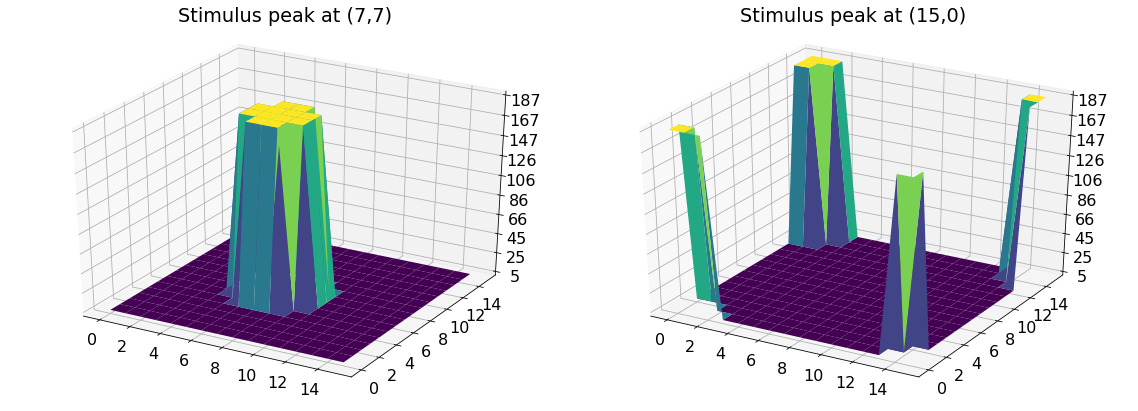

In [215]:
# fig = plt.figure(figsize=(12, 8), dpi=600)
fig = plt.figure(figsize=(16, 6), dpi=600)
ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax = fig.gca(projection='3d')

rates = generate_square_rates([7,7], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=2.5, f_mean = 20)
# Plot the surface.
X, Y = np.meshgrid(np.arange(rates.shape[0]), np.arange(rates.shape[0]))

surf = ax.plot_surface(X, Y, rates, cmap=cm.viridis,
                       linewidth=0, antialiased=True, vmax=np.max(rates)*1.)

ax.set_title("Stimulus peak at (7,7)\n")

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# ax2 = fig.gca(projection='3d')
X, Y = np.meshgrid(np.arange(rates.shape[0]), np.arange(rates.shape[0]))

rates2 = generate_square_rates([15,0], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=2.5, f_mean = 20)

surf2 = ax2.plot_surface(X, Y, rates2, cmap=cm.viridis,
                       linewidth=0, antialiased=True, vmax=np.max(rates)*1.)
ax2.set_title("Stimulus peak at (15,0)\n")
# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.xaxis.set_major_locator(LinearLocator(8))
# ax.yaxis.set_major_locator(LinearLocator(8))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# ax2.xaxis.set_major_locator(LinearLocator())
# ax2.yaxis.set_major_locator(LinearLocator(8))
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(surf2, cax=cax)
# cbar.set_label("Spearman rank-order correlation", fontsize=14)
plt.tight_layout()
fig.savefig("3d_stimulus_location_square.png")


# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=10)